In [1]:
import os
from pathlib import Path
import logging


logging.basicConfig(level=logging.INFO,format='[%(asctime)s]:%(message)s:')

In [2]:
project_name='hate'

In [4]:
list_of_files = [
    f"{project_name}/components/__init__.py",
    f"{project_name}/components/data_ingestion.py",
    f"{project_name}/components/data_transformation.py",
    f"{project_name}/components/model_trainer.py",
    f"{project_name}/components/__init__.py",
    f"{project_name}/components/model_pusher.py",
    f"{project_name}/configuration/gcloud_syncer.py",
    f"{project_name}/configuration/__init__.py",
    f"{project_name}/constants/__init__.py",
    f"{project_name}/entity/__init__.py",
    f"{project_name}/entity/config_entity.py",
    f"{project_name}/entity/artifact_entity.py",
    f"{project_name}/exception/__init__.py",
    f"{project_name}/logger/__init__.py",
    f"{project_name}/pipeline/__init__.py",
    f"{project_name}/pipeline/train_pipeline.py",
    f"{project_name}/pipeline/prediction_pipeline.py",
    f"{project_name}/ml/__init__.py",
    f"{project_name}/ml/model.py",
    "app.py",
    "demo.py",
    "requirements.txt",
    "Dockerfile",
    "setup.py",
    ".dockerignore"
]


for filepath in list_of_files:
    filepath = Path(filepath)
    filedir,filename=os.path.split(filepath)

    if filedir !="":
        os.makedirs(filedir,exist_ok=True)
        logging.info(f"Creating directory: {filedir} for the file: {filename}")

        if (not os.path.exists(filepath)) or (os .path.getsize(filepath)==0):
            with open(filepath,"w")as f:
                pass
                logging.info(f"creating empty file: {filepath}")
        else:
          logging.info(f"{filename} is already exists")

[2025-02-28 16:15:27,533]:Creating directory: hate\components for the file: __init__.py:
[2025-02-28 16:15:27,534]:creating empty file: hate\components\__init__.py:
[2025-02-28 16:15:27,536]:Creating directory: hate\components for the file: data_ingestion.py:
[2025-02-28 16:15:27,537]:creating empty file: hate\components\data_ingestion.py:
[2025-02-28 16:15:27,539]:Creating directory: hate\components for the file: data_transformation.py:
[2025-02-28 16:15:27,541]:creating empty file: hate\components\data_transformation.py:
[2025-02-28 16:15:27,542]:Creating directory: hate\components for the file: model_trainer.py:
[2025-02-28 16:15:27,543]:creating empty file: hate\components\model_trainer.py:
[2025-02-28 16:15:27,545]:Creating directory: hate\components for the file: __init__.py:
[2025-02-28 16:15:27,546]:creating empty file: hate\components\__init__.py:
[2025-02-28 16:15:27,547]:Creating directory: hate\components for the file: model_pusher.py:
[2025-02-28 16:15:27,549]:creating emp

In [10]:
!python demo.py

In [1]:
import pandas as pd
imbalanced_data=pd.read_csv('../../0-Data/HateSpeech/archive/labeled_data.csv')

In [3]:
imbalanced_data.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [4]:
imbalanced_data['class'].unique()

array([2, 1, 0])

<Axes: xlabel='class', ylabel='count'>

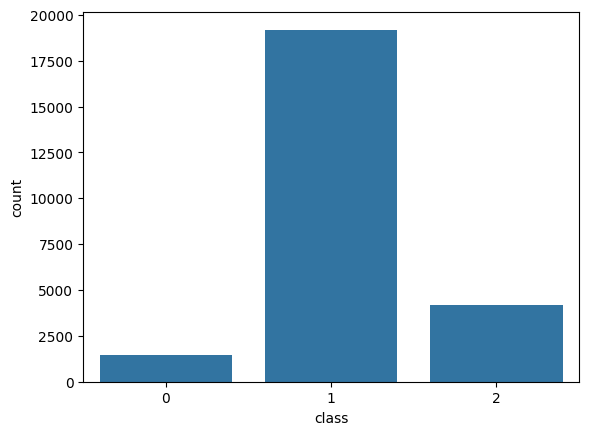

In [5]:
import seaborn as sns
#for classifing data
sns.countplot(x='class',data=imbalanced_data)


In [ ]:
#the model can be bias to 1


In [7]:
imbalanced_data.isnull().sum()

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [ ]:
#you have 3 classes, hate , abusive and no hate
#abusive can be hate or no  hate
#then copy the values of the class 1 into class 0

In [8]:
#replace the values of 0 to 1
imbalanced_data['class'].replace({0:1},inplace=True)

C:\Users\Aya Atef\AppData\Local\Temp\ipykernel_11704\1251866336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imbalanced_data['class'].replace({0:1},inplace=True)


In [9]:
imbalanced_data['class'].unique()

array([2, 1])

<Axes: xlabel='class', ylabel='count'>

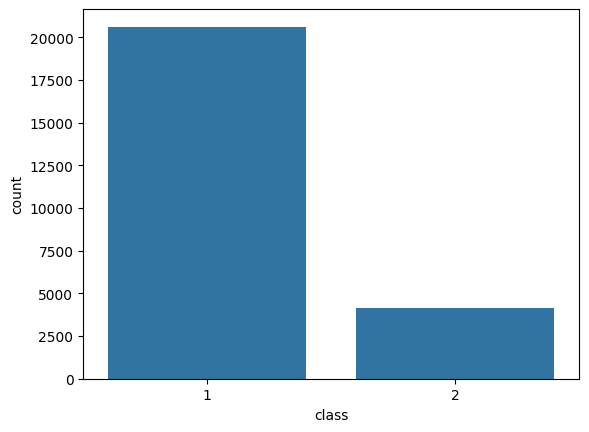

In [12]:
sns.countplot(x='class',data=imbalanced_data)

preprocssing

In [21]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\Aya
[nltk_data]     Atef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

stemming

In [22]:
stemmer=nltk.SnowballStemmer('english')
stopwords=set(stopwords.words('english'))

In [15]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [27]:
# Let's apply regex and do cleaning.
def data_cleaning(words):
    words = str(words).lower()
    words = re.sub('\[.*?\]', '', words)
    words = re.sub('https?://\S+|www\.\S+', '', words)
    words = re.sub('<.*?>+', '', words)
    words = re.sub('[%s]' % re.escape(string.punctuation), '', words)
    words = re.sub('\n', '', words)
    words = re.sub('\w*\d\w*', '', words)
    words = [word for word in words.split(' ') if words not in stopwords]
    words = " ".join(words)
    words = [stemmer.stem(words) for word in words.split(' ')]
    words = " ".join(words)

    return words


Apply data cleaning

In [28]:
import string
imbalanced_data['tweet']=imbalanced_data['tweet'].apply(data_cleaning)

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x=imbalanced_data['tweet']
y=imbalanced_data['class']

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

print(len(x_train),len(y_train))
print(len(x_test),len(y_test))

18587 18587
6196 6196


Feature Engineering 

In [35]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences

In [36]:
#integar encoding of the data
max_words = 50000
max_len = 300

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(x_train)

sequences = tokenizer.texts_to_sequences(x_train)
sequences_matrix = pad_sequences(sequences, maxlen=max_len)


In [37]:
#embedding layer gernrates the actual vector
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.optimizers import RMSprop


In [38]:
# Creating model architecture.
model = Sequential()
model.add(Embedding(max_words, 100, input_length=max_len))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])


c:\Applications\anaconda3\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)